In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data https://www.kaggle.com/c/titanic/data

In [2]:
data = pd.read_csv('train_titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**1. Постройте изображение с двумя подграфиками. На одном столбцовая диаграмма числа пассажиров в зависимости от того выжили они или нет. На другом столбцовая диаграма числа пассажиров в зависиости от класса их билета**

In [4]:
# Ваш код здесь

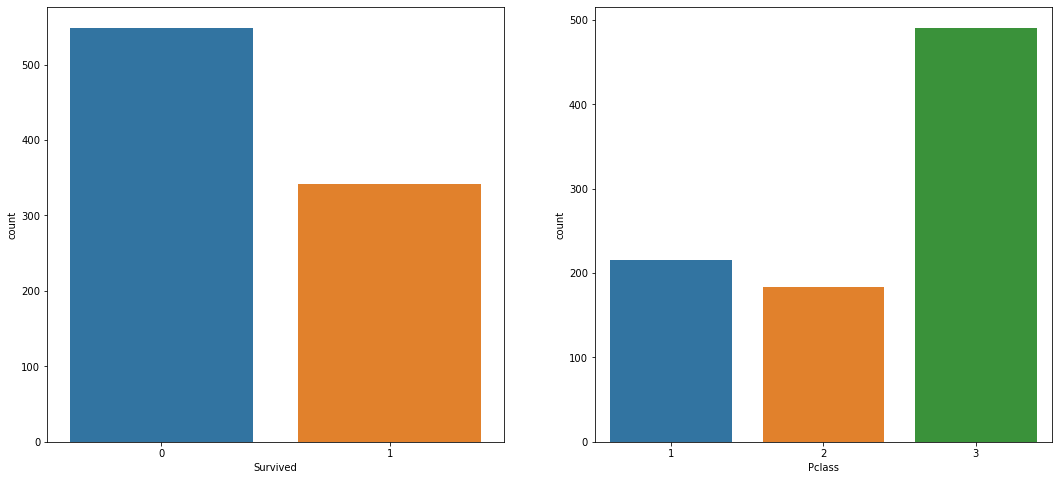

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.countplot('Survived', data=data, ax=ax[0])
sns.countplot('Pclass', data=data, ax=ax[1]);

Вопросы:
1. Больше выживших или погибших?
2. В каком классе больше пассажиров?

**2.0 Подсчитайте число людей в разрезе выживаемости и пола.**

In [6]:
# Ваш код здесь

In [7]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

**2.1 Постройте изображение с четырьмя подграфиками (2х2) столбцовых диаграм.**
- Доля числа пассажиров в зависимости от пола
- Число пассажиров в зависиости от их пола по разрезу выживаемости
- Число пассажиров в зависимости от их класса
- Число пассажиров в зависиости от их класса по разрезу выживаемости

In [8]:
# Ваш код здесь

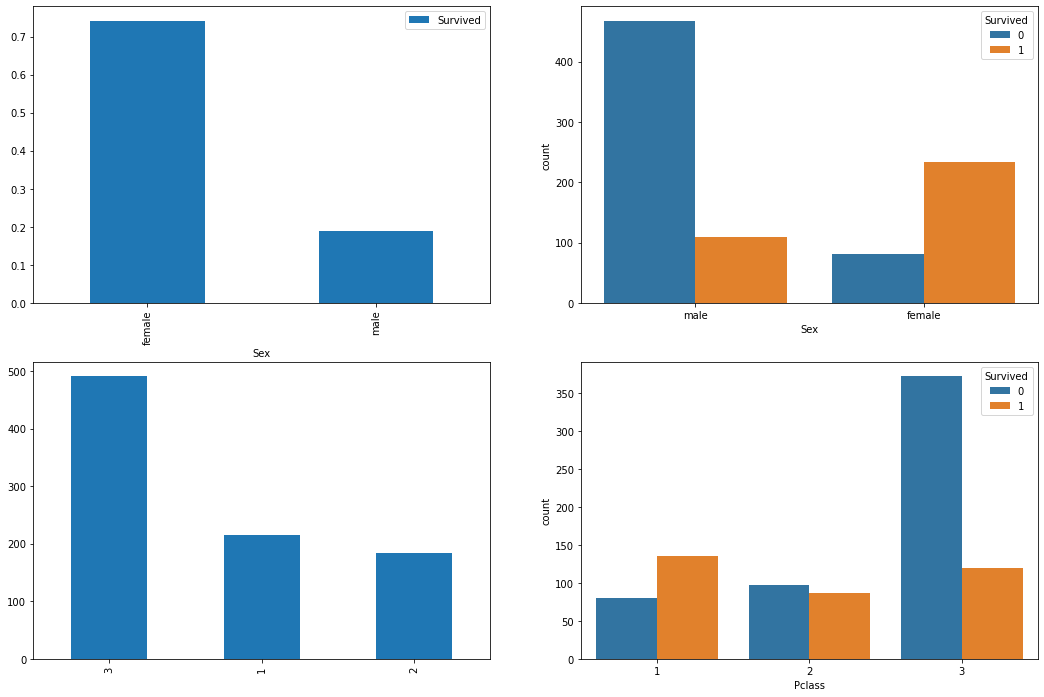

In [9]:
f,ax = plt.subplots(2, 2, figsize=(18, 12))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0, 0])
sns.countplot('Sex', hue='Survived', data=data, ax=ax[0, 1]);
data['Pclass'].value_counts().plot.bar(ax=ax[1, 0])
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1, 1]);

Вопросы:
1. Какой пол чаще погибает?
2. В каком классе выживших больше, чем погибших?
3. В каком классе больше всего погибших?

**3. Постройте изображение с двумя подграфиками скрипичных диаграм.**
- Возраст в зависимости от класса
- Возраст от пола 

Поставьте отсечки на шкале x от 0 до 100 с шагом 10  
Параметр split может помочь сделать граффики более наглядными

In [10]:
# Ваш код здесь

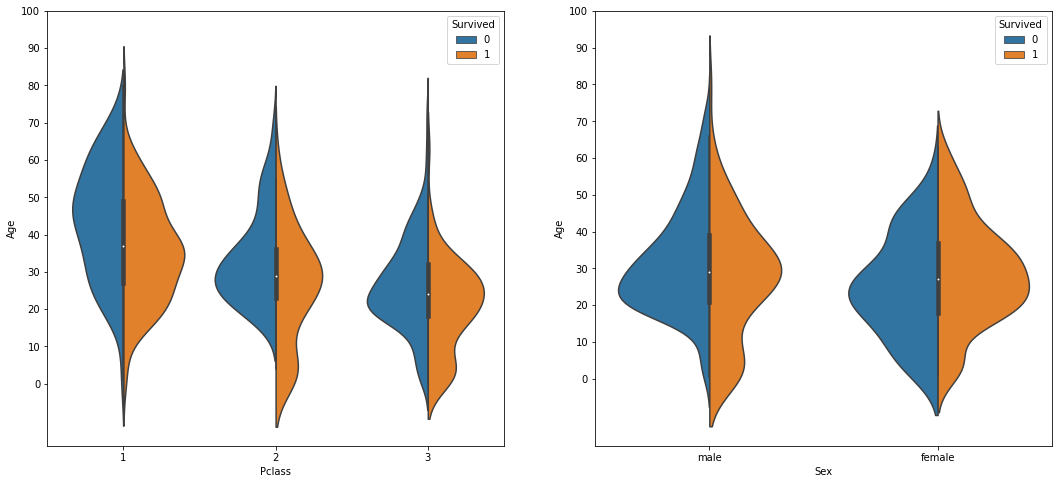

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_yticks(range(0, 110, 10));

Верно или нет?  
1. Количество детей увеличивается с Pclass, а выживаемость детей выглядит хорошей независимо от Pclass.  
2. Шансы на выживание для пассажиров в возрасте 20-50 лет из Pclass1 высоки, но хуже чем для женщин.  
3. Для мужчин шансы на выживание растут с возрастом.  

**4. Постройте изображение с двумя подграфиками гистограмм.**
- Распределение выживших по возрасту (зеленая заливка, черная обводка)
- Распределение погибших по возрасту (красная заливка, черная обводка)  
Возьмите число бинов 20

In [12]:
# Ваш код здесь

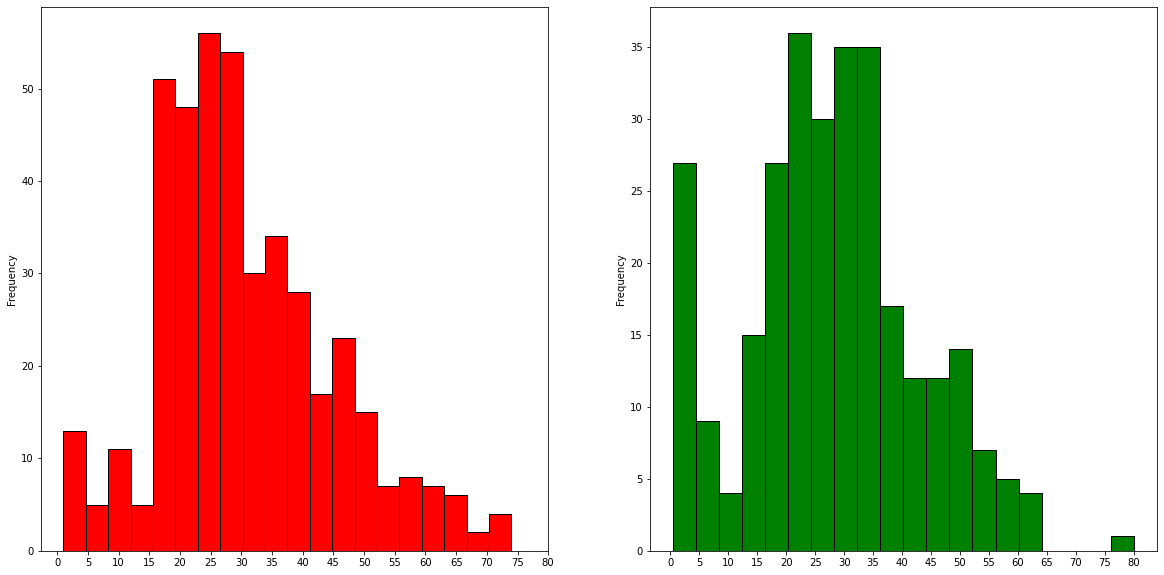

In [15]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_xticks(list(range(0,85,5)))
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_xticks(list(range(0,85,5)));

Вопрос:
1. В какой возрастной группе самое большое отличие в числе выживших и погибших?

**5. Постройте изображение с тремя подграфиками распределения плотности.**
- Распределение тарифов в первом классе
- Распределение тарифов во втором классе
- Распределение тарифов в третьем классе

In [14]:
# Ваш код здесь

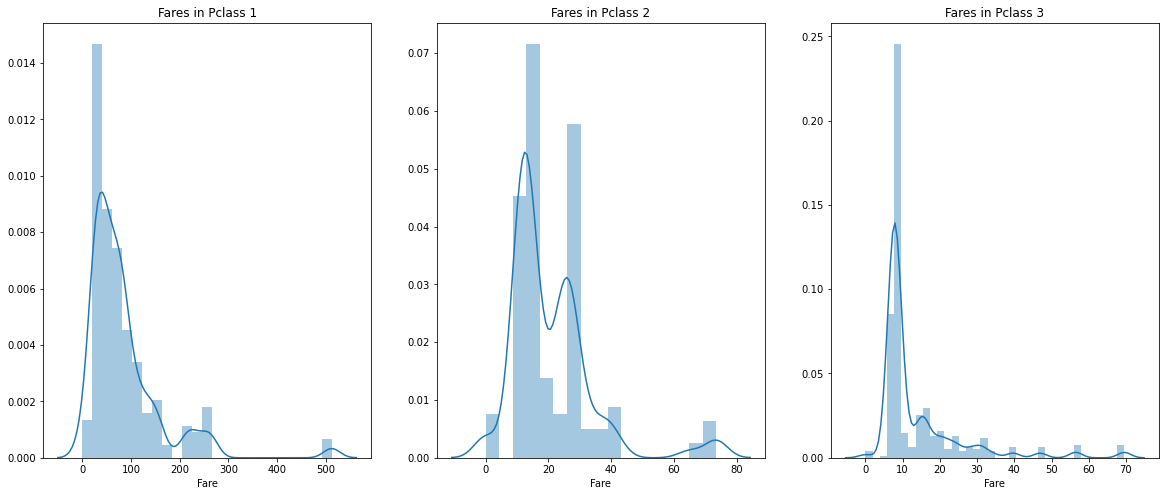

In [15]:
f, ax=plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3');

Вопросы:
1. В каком классе распределение тарифов самое широкое?
2. В каком классе распределение тарифов имеет два пика?

**6. Постройте матрицу корреляции**

In [16]:
# Ваш код здесь

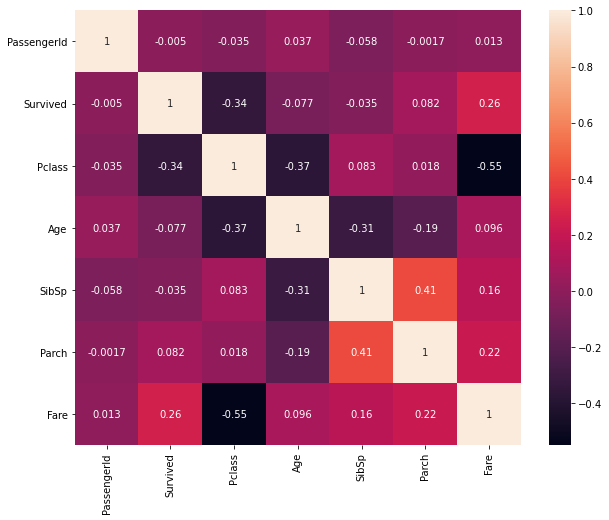

In [17]:
sns.heatmap(data.corr(), annot=True)
fig=plt.gcf()
fig.set_size_inches(10,8);

Вопросы:
1. Какая фича имеет самую большую корреляцию с выживаемостью?
2. Какие две фичи имеют наибольшую корреляцию?